In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pl
import os
import urllib

In [2]:
# fetch and load the data
DATA_SOURCE_ROOT = "https://raw.githubusercontent.com/anasafzal-ai/PredictDiabetes/main/"
DIR_PATH = os.path.join("datasets", "diabetes")
URL = DATA_SOURCE_ROOT + "diabetes.csv"

def fetch_diabetes_dataset(url=URL, directory=DIR_PATH):
    if not os.path.isdir(directory):
        os.makedirs(directory)
    csv_path = os.path.join(directory, "diabetes.csv")
    urllib.request.urlretrieve(url, csv_path)
    

In [3]:
fetch_diabetes_dataset()


In [4]:
#load the dataset into the evironment
def load_diabetes_dataset(directory = DIR_PATH):
    csv_path = os.path.join(directory, "diabetes.csv")
    return pd.read_csv(csv_path)

In [5]:
diabetes = load_diabetes_dataset()

In [6]:
#Let's take a quick look at the data structure
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes.info()
#we can see there are all numerical attributes, with no categorical attributes. 
#We can also see at first glance that there are not any null values present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


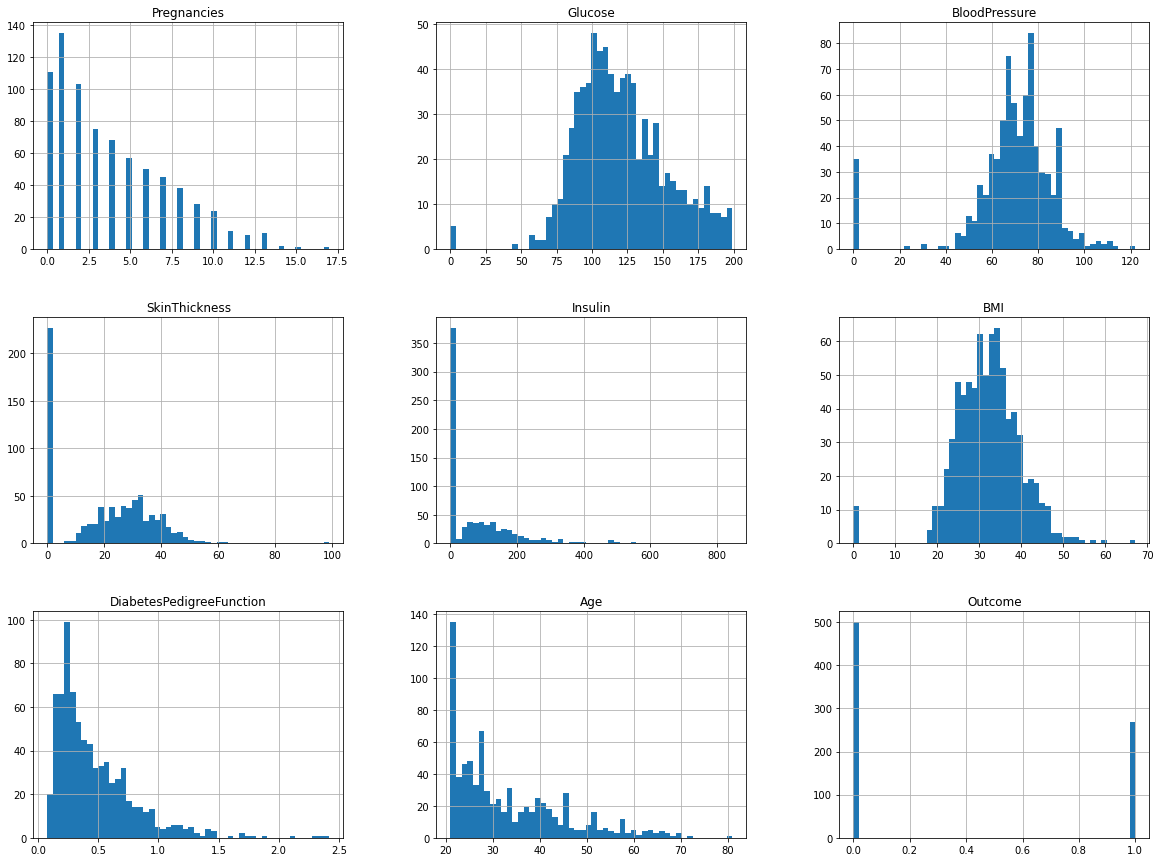

In [9]:
#plot a histogram for each numerical attribute
diabetes.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
# There are a few things noticeable from these histograms:

# 1. There are a number of attributes which have a value of 0, that in reality should not be possible. The data has 
# most likely been subjected to imputation, where missing data has been replaced with the value 0. Working with 
# preprocessed data is quite common and not necessarily a problem in this case, but it's always good to understand 
# how this data has been gathered.

# 2. The range of pregancies is incredibly high from 0 all the way 17 as is the Blood Pressure (20-120), BMI (20-60), 
# and Glucose 2hr value range of between (50-200). 

# 3. These attributes have very different scales. Will need to apply feature scaling techniques later. 

# 4. There are a clear mixture of tail-heavy,symmetric unimodal, and bimodal histograms. This may make it harder for
# some Machine Learning models to detect patterns. Will need to transform these features so that they are more 
# unimodal in their distribution.


<function matplotlib.pyplot.show(close=None, block=None)>

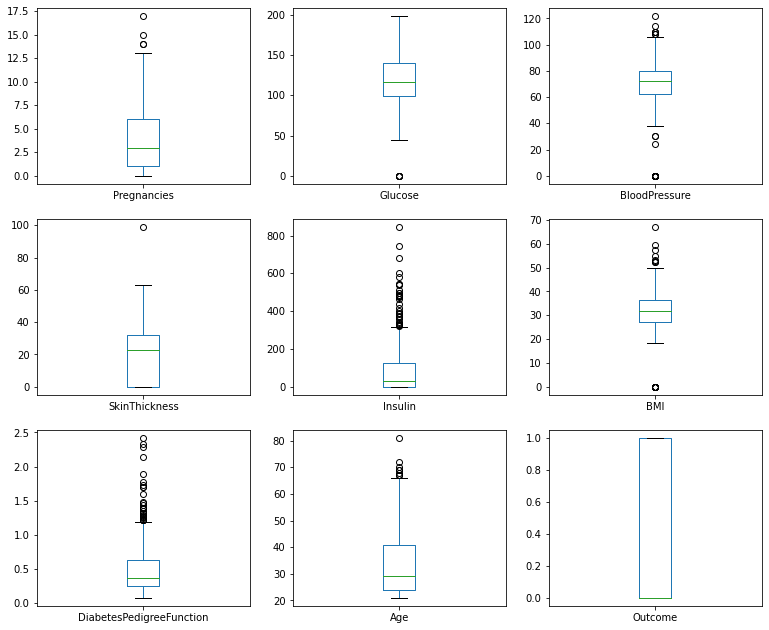

In [11]:
diabetes.plot(kind= 'box' , subplots=True, layout=(3,3), figsize=(13,11))
plt.show

In [12]:
#As we can see there are definitely many outliers in this dataset, particularly
#With Pregnancies, Insulin, BMI & Blood Pressure.
#We may need to clip some of these features later on 

In [13]:
#Let's create a test set, before we investigate the data any further to eliminate "data snooping" bias. 
import sklearn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(diabetes, test_size = 0.15, random_state=42)

In [14]:
train_set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
227,3,162,52,38,0,37.2,0.652,24,1
168,4,110,66,0,0,31.9,0.471,29,0
513,2,91,62,0,0,27.3,0.525,22,0
7,10,115,0,0,0,35.3,0.134,29,0
196,1,105,58,0,0,24.3,0.187,21,0
...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,0
106,1,96,122,0,0,22.4,0.207,27,0
270,10,101,86,37,0,45.6,1.136,38,1
435,0,141,0,0,0,42.4,0.205,29,1


In [15]:
test_set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
728,2,175,88,0,0,22.9,0.326,22,0
49,7,105,0,0,0,0.0,0.305,24,0
662,8,167,106,46,231,37.6,0.165,43,1
411,1,112,72,30,176,34.4,0.528,25,0


In [16]:
#Since we dont have a large enough dataset, we risk introducing significant sampling bias. 
#Thus, to ensure that the right number of instances are samples from each stratum to ensure that the test set 
#represents the overall population, we should use stratified sampling. 
#From researching the available attributes and their relation, in terms of importance in being used for 
#predicting diabetes, you know that the Glucose Tolerance Test (GTT) is an incredibly important attribute. 
#As GTT is a method which can help to diagnose instances of diabetes mellitus or insulin resistance.
# The GTT results should show that:
# At 2hrs, people without diabetes will be under 140 mg/dL
# At 2hrs, people at risk of diabetes (prediabetes) will be 140 and 199 mg/dL
# At 2hrs, people at diabetic levels will be over 200 mg/dL
# So, we should ensure that the test set is representative of the various categories of GTT in the whole dataset
# Since the Glucose attribute is a continuous numerical attribute, we need to first create a 
# Glucose Category attribute.

diabetes['Glucose_Category'] = pd.cut(diabetes['Glucose'], 
                                     bins = [0.0, 140.0, 199.0], 
                                     labels = [1, 2])


#There were some NaN values created for those rows with Glucose = 0, so let's ensure they also get captured
for index, row in diabetes.iterrows():
    if row['Glucose'] == 0:
        diabetes.at[index,'Glucose_Category'] = 1
        



In [17]:
diabetes['Glucose_Category'].value_counts()

1    576
2    192
Name: Glucose_Category, dtype: int64

In [18]:
#Now we're ready to do stratified sampling based on the GTT.

from sklearn.model_selection import StratifiedShuffleSplit

strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)

for train_index, test_index in strat_shuff_split.split(diabetes, diabetes['Glucose_Category']):
    strat_train_set = diabetes.loc[train_index]
    strat_test_set = diabetes.loc[test_index]

In [19]:
#Let's check to see if this worked as expected:

test_stratified_proportions = strat_test_set['Glucose_Category'].value_counts() / len(strat_test_set)

original_dataset_proportions = diabetes['Glucose_Category'].value_counts() / len(diabetes)

print(f'The Proportions For The Test Set is:\n{test_stratified_proportions} \n The Proportions For The Original Dataset is: \n{original_dataset_proportions}')

The Proportions For The Test Set is:
1    0.75
2    0.25
Name: Glucose_Category, dtype: float64 
 The Proportions For The Original Dataset is: 
1    0.75
2    0.25
Name: Glucose_Category, dtype: float64


In [20]:
#Now that our test set, using Stratified Sampling,  has Glucose Category proportions identical to that in the 
#origninal dataset, let's remove the "Glucose_Category" attribute so the data is back to it's orgininal state:

for i in (strat_train_set, strat_test_set):
    i.drop("Glucose_Category", axis=1, inplace=True)

<AxesSubplot:xlabel='Glucose', ylabel='Age'>

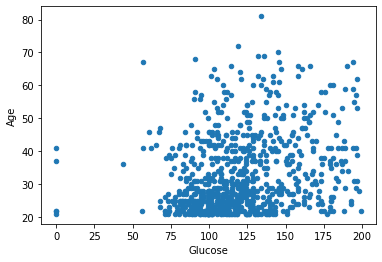

In [21]:
#Discover & Visualise The Data To Gain Insights
diabetes.plot(kind='scatter', x='Glucose', y='Age')

<AxesSubplot:xlabel='BMI', ylabel='Glucose'>

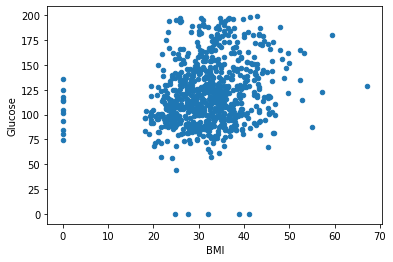

In [22]:
diabetes.plot(kind='scatter', x='BMI', y='Glucose')

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

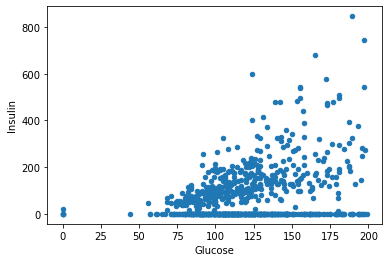

In [23]:
diabetes.plot(kind='scatter', x='Glucose', y='Insulin')

<AxesSubplot:xlabel='Age', ylabel='BMI'>

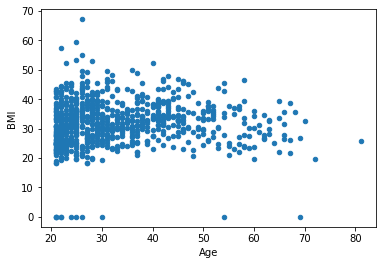

In [24]:
diabetes.plot(kind='scatter', x='Age', y='BMI')

In [25]:
#Let's look at some correlations
corr_matrix = diabetes.corr()

In [26]:
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [27]:
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [28]:
#Experimenting With Attribute Combinations
diabetes['BMI_Per_Age'] = diabetes['BMI'] / diabetes['Age']
diabetes['Pregnancies_Per_Age'] = diabetes['Pregnancies'] / diabetes['Age']
diabetes['Insulin_Per_Age'] = diabetes['Insulin'] / diabetes['Age']
diabetes['BloodPressure_Per_Age'] = diabetes['BloodPressure'] / diabetes['Age']

In [29]:
corr_matrix = diabetes.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Pregnancies_Per_Age         0.163744
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Insulin_Per_Age             0.045020
BMI_Per_Age                -0.029840
BloodPressure_Per_Age      -0.193117
Name: Outcome, dtype: float64

In [30]:
#Not Bad! Blood Pressure Per Age is much more correlated with the "outcome" than the
#Blood Pressure attibrute by itself. 

In [31]:
#Prepare The Data For Machine Learning Algorithms
diabetes = strat_train_set.drop('Outcome', axis=1) #Drop labels for training set
diabetes_labels = strat_train_set['Outcome'].copy() #Create a copy of the labels

In [32]:
#Let's create a custom transformer class that removes the outliers we discussed earlier
from sklearn.base import BaseEstimator, TransformerMixin

#get the column indices
col_names = "BloodPressure", "BMI", "Insulin", "Pregnancies"
bloodp_ix, bmi_ix, insulin_ix, pregnancies_ix = [diabetes.columns.get_loc(i) for i in col_names]

class ClipOutliers(BaseEstimator, TransformerMixin):
    
    def __init__(self, clip_outliers = True):
        self.clip_outliers = clip_outliers
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):        
        boundary_bloodp = (np.percentile(X.iloc[:, bloodp_ix], 75) - np.percentile(X.iloc[:, bloodp_ix], 25)) * 1.5
        lower_bloodp, upper_bloodp = np.percentile(X.iloc[:, bloodp_ix], 25) - boundary_bloodp, np.percentile(X.iloc[:, bloodp_ix], 75) + boundary_bloodp

        boundary_bmi = (np.percentile(X.iloc[:, bmi_ix], 75) - np.percentile(X.iloc[:, bmi_ix], 25)) * 1.5
        lower_bmi, upper_bmi = np.percentile(X.iloc[:, bmi_ix], 25) - boundary_bmi, np.percentile(X.iloc[:, bmi_ix], 75) + boundary_bmi
        
        boundary_preg = (np.percentile(X.iloc[:, pregnancies_ix], 75) - np.percentile(X.iloc[:, pregnancies_ix], 25)) * 1.5
        lower_preg, upper_preg = np.percentile(X.iloc[:, pregnancies_ix], 25) - boundary_preg, np.percentile(X.iloc[:, pregnancies_ix], 75) + boundary_preg
        
        if self.clip_outliers:
            boundary_insulin = (np.percentile(X.iloc[:, insulin_ix], 75) - np.percentile(X.iloc[:, insulin_ix], 25)) * 1.5
            lower_insulin, upper_insulin = np.percentile(X.iloc[:, insulin_ix], 25) - boundary_insulin, np.percentile(X.iloc[:, insulin_ix], 75) + boundary_insulin

            return X[(X.iloc[:,bloodp_ix] > lower_bloodp) & (X.iloc[:,bloodp_ix] < upper_bloodp) & (X.iloc[:,bmi_ix] > lower_bmi) & 
                     (X.iloc[:,bmi_ix] < upper_bmi) & (X.iloc[:,pregnancies_ix] > lower_preg) & (X.iloc[:,pregnancies_ix] < upper_preg) & (X.iloc[:,insulin_ix] > lower_insulin) & (X.iloc[:,insulin_ix] < upper_insulin)]
        else:
            return X[(X.iloc[:,bloodp_ix] > lower_bloodp) & (X.iloc[:,bloodp_ix] < upper_bloodp) & (X.iloc[:,bmi_ix] > lower_bmi) & 
                     (X.iloc[:,bmi_ix] < upper_bmi) & (X.iloc[:,pregnancies_ix] > lower_preg) & (X.iloc[:,pregnancies_ix] < upper_preg)]
        
            
outliers_clipper = ClipOutliers(clip_outliers=False)
diabetes_clipped = outliers_clipper.transform(diabetes)

In [33]:
diabetes_clipped

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,1,80,74,11,60,30.0,0.527,22
199,4,148,60,27,318,30.9,0.150,29
550,1,116,70,28,0,27.4,0.204,21
689,1,144,82,46,180,46.1,0.335,46
627,0,132,78,0,0,32.4,0.393,21
...,...,...,...,...,...,...,...,...
265,5,96,74,18,67,33.6,0.997,43
42,7,106,92,18,0,22.7,0.235,48
72,13,126,90,0,0,43.4,0.583,42
52,5,88,66,21,23,24.4,0.342,30


In [34]:
#Since missing data has already been dealt with through imputation in the dataset
#No need to replace missing values
#Since there are no categorical attributes, we don't need to OneHotEncode any attribute either
#However, we definitely need to perform some feature scaling as our numerical attributes have very different scales
#Let's build a Pipeline for preprocessing the numerical attributes

from sklearn.pipeline import Pipeline  
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                ('outlier_clipper', ClipOutliers(clip_outliers=False)),
                ('std_scaler', StandardScaler())
                            ])

diabetes_attribs_transformed = num_pipeline.fit_transform(diabetes)

diabetes_attribs_prepared = pd.DataFrame(diabetes_attribs_transformed,columns=list(diabetes_clipped.columns), index=diabetes_clipped.index )


In [35]:
diabetes_attribs_transformed

array([[-0.87195924, -1.27961249,  0.16818962, ..., -0.33320977,
         0.16366936, -0.96278497],
       [ 0.04367414,  0.84508597, -1.07973581, ..., -0.19302686,
        -1.01180016, -0.36757022],
       [-0.87195924, -0.15477213, -0.1883605 , ..., -0.73818261,
        -0.84343052, -1.04781565],
       ...,
       [ 2.79057427,  0.15768353,  1.5943901 , ...,  1.75395796,
         0.33827491,  0.7378286 ],
       [ 0.34888526, -1.02964796, -0.54491063, ..., -1.20545897,
        -0.41315255, -0.28253954],
       [-0.56674811, -0.34224552,  0.16818962, ...,  0.04061132,
         0.69683989, -0.53763158]])

In [36]:
diabetes_attribs_prepared

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,-0.871959,-1.279612,0.168190,-0.659893,-0.216057,-0.333210,0.163669,-0.962785
199,0.043674,0.845086,-1.079736,0.375098,1.964308,-0.193027,-1.011800,-0.367570
550,-0.871959,-0.154772,-0.188361,0.439785,-0.723118,-0.738183,-0.843431,-1.047816
689,-0.871959,0.720104,0.881290,1.604150,0.798066,2.174507,-0.434978,1.077951
627,-1.177170,0.345157,0.524740,-1.371450,-0.723118,0.040611,-0.254137,-1.047816
...,...,...,...,...,...,...,...,...
265,0.348885,-0.779683,0.168190,-0.207084,-0.156899,0.227522,1.629109,0.822859
42,0.959308,-0.467228,1.772665,-0.207084,-0.723118,-1.470249,-0.746774,1.248013
72,2.790574,0.157684,1.594390,-1.371450,-0.723118,1.753958,0.338275,0.737829
52,0.348885,-1.029648,-0.544911,-0.013023,-0.528744,-1.205459,-0.413153,-0.282540


In [37]:
#need to make sure our outcome labels are correctly filtered as well
diabetes_labels_clipped = diabetes_labels.filter(list(diabetes_clipped.index))
diabetes_labels_clipped

432    0
199    1
550    0
689    1
627    0
      ..
265    0
42     0
72     1
52     0
85     0
Name: Outcome, Length: 601, dtype: int64

In [38]:
round(len(diabetes_attribs_prepared) *.8)

481

In [39]:
#Time to Select & Train A Model
#First, let's split the data for training and finetuning 
#Now, for our objective, we want to be able to predict if someone will become diabetic. And so, we care more about 
#The positive cases. So let's set the outcome labels to only positive for a binary prediction.  

X_train, y_train, X_test, y_test = diabetes_attribs_prepared[:480], diabetes_labels_clipped[:480],diabetes_attribs_prepared[480:], diabetes_labels_clipped[480:]

y_train_diabetic = y_train == 1
y_test_diabetic = y_test == 1

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
#SGD
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_classifier.fit(X_train, y_train_diabetic)
sgd_classifier_prediction = sgd_classifier.predict(X_test)
sgd_classifier_prediction
print('The accuracy of the SGD is', accuracy_score(sgd_classifier_prediction,y_test_diabetic))


The accuracy of the SGD is 0.7024793388429752


In [44]:

#Descision Tree
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2) 
dt_classifier.fit(X_train, y_train_diabetic)
dt_classifier_prediction = dt_classifier.predict(X_test)
dt_classifier_prediction
print('The accuracy of the Decision Tree is',accuracy_score(dt_classifier_prediction,y_test_diabetic))


The accuracy of the Decision Tree is 0.71900826446281


In [45]:

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(weights='distance', n_neighbors=6) 
knn_classifier.fit(X_train, y_train_diabetic)
knn_classifier_prediction = knn_classifier.predict(X_test)
knn_classifier_prediction
print('The accuracy of the K Nearest Neighbors is',
      accuracy_score(knn_classifier_prediction,y_test_diabetic))


The accuracy of the K Nearest Neighbors is 0.7107438016528925


In [46]:
#Logisitic Regression
from sklearn.linear_model import LogisticRegression 
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, y_train_diabetic)
logreg_classifier.predict_proba(X_test)
logreg_classifier_predicted = logreg_classifier.predict(X_test)
print('The accuracy of the Logistic Regression is',
      accuracy_score(logreg_classifier_predicted, y_test_diabetic))


The accuracy of the Logistic Regression is 0.6942148760330579


In [47]:
#SVC
from sklearn import svm
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train_diabetic)
svm_classifier_prediction = svm_classifier.predict(X_test)
print('The accuracy of the SVM is',accuracy_score(svm_classifier_prediction, y_test_diabetic))


The accuracy of the SVM is 0.6776859504132231


In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)
rf.fit(X_train, y_train_diabetic)
rf_prediction = rf.predict(X_test)
print('The accuracy of the Random Forest is',accuracy_score(rf_prediction, y_test_diabetic))

The accuracy of the Random Forest is 0.7024793388429752


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=50, max_depth = 3, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(X_train, y_train_diabetic)


from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train_diabetic)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test_diabetic, y_pred))

LogisticRegression 0.6942148760330579
RandomForestClassifier 0.7024793388429752
SVC 0.6776859504132231
VotingClassifier 0.6859504132231405


In [52]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)


for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train_diabetic)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test_diabetic, y_pred))

LogisticRegression 0.6942148760330579
RandomForestClassifier 0.6859504132231405
SVC 0.6776859504132231
VotingClassifier 0.7107438016528925


In [53]:
#To Summarise
results=[]
classifiers=['SGD', 'Decision Tree','KNN','Logistic Regression','SVC','Random Forest', 'Voting Classifier']
models=[sgd_classifier,dt_classifier,knn_classifier,logreg_classifier,svm_classifier,rf, voting_clf]
for m in models:
    model = m
    model.fit(X_train,y_train_diabetic)
    prediction=model.predict(X_test)
    results.append(accuracy_score(prediction,y_test_diabetic))
results_df=pd.DataFrame(data=results,index=classifiers)   
results_df.columns=['Accuracy']
results_df.sort_values(by='Accuracy',ascending=False)

,Accuracy
Decision Tree,0.719008
KNN,0.710744
Voting Classifier,0.710744
SGD,0.702479
Random Forest,0.702479
Logistic Regression,0.694215
SVC,0.677686


In [54]:
# Let's try Fine-Tuning These Models' Hyperparameters & To See If We Can Get Better Results Using GridSearchCV
# & RandomizedSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [56]:
#Fine Tuning Decision-Tree Model Hyperparameters using GridSearchCV

dt_param_grid = [
        {'criterion':['gini','entropy'],  'max_leaf_nodes': list(range(2,100)), 
         'min_samples_split': [2, 4, 6, 8], 'max_depth': [2, 3, 4, 5, 6]}
              ]
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=5, verbose=1)

dt_grid_search.fit(X_train, y_train_diabetic)



Fitting 5 folds for each of 3920 candidates, totalling 19600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 19600 out of 19600 | elapsed:  2.8min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 3, 4, 5, 6],
                          'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                             13, 14, 15, 16, 17, 18, 19, 20, 21,
                                             22, 23, 24, 25, 26, 27, 28, 29, 30,
                                             31, ...],
                          'min_samples_split': [2, 4, 6, 8]}],
             verbose=1)

In [57]:
#Fine Tuning KNN Model Hyperparameters using GridSearchCV
knn_param_grid = [
                {'n_neighbors':[2, 3, 5, 8, 12, 20],
                'weights': ['uniform', 'distance'], 
                'metric': ['euclidean', 'manhattan']}
                    ]
knn_classifier = KNeighborsClassifier()

knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=5, verbose=1)

knn_grid_search.fit(X_train, y_train_diabetic)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.5s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'manhattan'],
                          'n_neighbors': [2, 3, 5, 8, 12, 20],
                          'weights': ['uniform', 'distance']}],
             verbose=1)

In [58]:
#Fine Tuning Our Stochastic Gradient Descent Model Hyperparameters using RandomizedSearchCV

sgd_param_grid = [
            {'loss':['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
            'penalty':['l1', 'l2', 'elasticnet'],
            'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 
            'learning_rate':['constant', 'optimal', 'invscaling', 'adaptive'],
            'eta0': [1, 10, 100]}
                    ]

sgd_classifier = SGDClassifier()

sgd_grid_search = RandomizedSearchCV(sgd_classifier, sgd_param_grid, cv=5, verbose=1)

sgd_grid_search.fit(X_train, y_train_diabetic)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, estimator=SGDClassifier(),
                   param_distributions=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                   10, 100, 1000],
                                         'eta0': [1, 10, 100],
                                         'learning_rate': ['constant',
                                                           'optimal',
                                                           'invscaling',
                                                           'adaptive'],
                                         'loss': ['hinge', 'log',
                                                  'modified_huber',
                                                  'squared_hinge',
                                                  'perceptron'],
                                         'penalty': ['l1', 'l2',
                                                     'elasticnet']}],
                   verbose=1)

In [59]:
# Fine-Tuning our SVC Model Hyperparameters Using GridSearch CV

svc_param_grid = [
                {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
                {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
                    ]

svc_classifier = SVC(random_state=42)

svc_grid_search = GridSearchCV(svc_classifier, svc_param_grid, cv=5, verbose=1)

svc_grid_search.fit(X_train, y_train_diabetic)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   12.8s finished


GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             verbose=1)

In [60]:
#Let's Fine-Tune Our Random Forest Model to see if there can be improvements made
from sklearn.model_selection import GridSearchCV

param_grid = [
        #try 32 (8X4) combinations of hyperparameters
        {'n_estimators': [2, 3, 5, 8, 13, 21, 34, 56], 'max_features': [2, 4, 6, 8]}, 
        #then try 16 (4x4) combinations with bottstrap set as False
        {'bootstrap': [False], 'n_estimators': [5, 8, 13, 21], 'max_features':[2, 4, 6, 8]}    
              ]
rf_classifier = RandomForestClassifier(random_state=42)

#train across 5 folds, that's a total of (32+16)*5=240 rounds of training
rf_grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, verbose=3)

rf_grid_search.fit(X_train, y_train_diabetic)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] max_features=2, n_estimators=2 ..................................
[CV] ...... max_features=2, n_estimators=2, score=0.740, total=   0.0s
[CV] max_features=2, n_estimators=2 ..................................
[CV] ...... max_features=2, n_estimators=2, score=0.740, total=   0.0s
[CV] max_features=2, n_estimators=2 ..................................
[CV] ...... max_features=2, n_estimators=2, score=0.740, total=   0.1s
[CV] max_features=2, n_estimators=2 ..................................
[CV] ...... max_features=2, n_estimators=2, score=0.802, total=   0.0s
[CV] max_features=2, n_estimators=2 ..................................
[CV] ...... max_features=2, n_estimators=2, score=0.604, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV] ...... max_features=2, n_estimators=3, score=0.708, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV] ...... max

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   18.1s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [2, 3, 5, 8, 13, 21, 34, 56]},
                         {'bootstrap': [False], 'max_features': [2, 4, 6, 8],
                          'n_estimators': [5, 8, 13, 21]}],
             verbose=3)

In [61]:
print('The best hyperparameters for our Decision Tree Model is:', dt_grid_search.best_params_)
print('The best score for our Decision Tree Model is:', dt_grid_search.best_score_)
print('The best hyperparameters for our KNN Model is:', knn_grid_search.best_params_)
print('The best score for our KNN Model is:', knn_grid_search.best_score_)
print('The best hyperparameters for our Stochastic Gradient Descent Model is:', sgd_grid_search.best_params_)
print('The best score for our Stochastic Gradient Descent Model is:', sgd_grid_search.best_score_)
print('The best hyperparameters for our Random Forest Model is:', rf_grid_search.best_params_)
print('The best score for our Random Forest Model is:', rf_grid_search.best_score_)
print('The best hyperparameters for our SVC Model is:', svc_grid_search.best_params_)
print('The best score for our SVC Model is:', svc_grid_search.best_score_)

The best hyperparameters for our Decision Tree Model is: {'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 19, 'min_samples_split': 2}
The best score for our Decision Tree Model is: 0.7687499999999999
The best hyperparameters for our KNN Model is: {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
The best score for our KNN Model is: 0.7645833333333334
The best hyperparameters for our Stochastic Gradient Descent Model is: {'penalty': 'l2', 'loss': 'squared_hinge', 'learning_rate': 'optimal', 'eta0': 1, 'alpha': 0.1}
The best score for our Stochastic Gradient Descent Model is: 0.7645833333333333
The best hyperparameters for our Random Forest Model is: {'max_features': 2, 'n_estimators': 8}
The best score for our Random Forest Model is: 0.76875
The best hyperparameters for our SVC Model is: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
The best score for our SVC Model is: 0.775


In [115]:
#Let's summarise the accuracy of our fine-tuned models 
sgd_fine_tuned = SGDClassifier(**sgd_grid_search.best_params_)
knn_fine_tuned = KNeighborsClassifier(**knn_grid_search.best_params_)
dt_fine_tuned = DecisionTreeClassifier(**dt_grid_search.best_params_)
rf_fine_tuned = RandomForestClassifier(**rf_grid_search.best_params_)
svc_fine_tuned = SVC(**svc_grid_search.best_params_)

In [116]:
#To Summarise For Our Fine-Tuned Models
results=[]
classifiers=['Fine-Tuned SGD', 'Fine-Tuned Decision Tree','Fine-Tuned KNN','Fine-Tuned SVC','Fine-Tuned Random Forest']
models=[sgd_fine_tuned,dt_fine_tuned,knn_fine_tuned,svc_fine_tuned,rf_fine_tuned]
for m in models:
    model = m
    model.fit(X_train,y_train_diabetic)
    prediction=model.predict(X_test)
    results.append(accuracy_score(y_test_diabetic,prediction))
results_df=pd.DataFrame(data=results,index=classifiers)   
results_df.columns=['Accuracy']
results_df.sort_values(by='Accuracy',ascending=False)

,Accuracy
Fine-Tuned SGD,0.710744
Fine-Tuned SVC,0.694215
Fine-Tuned Random Forest,0.669421
Fine-Tuned Decision Tree,0.652893
Fine-Tuned KNN,0.652893


In [64]:
# Let's try out some Cross Validation and see if we can make any improvements
#So we use Cross Validation to  train and test our algorithm on each and every instance of the dataset.
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
results=[]
accuracy=[]
classifiers=['Fine-Tuned SGD', 'Fine-Tuned Decision Tree','Fine-Tuned KNN','Fine-Tuned SVC','Fine-Tuned Random Forest', 'Logistic Regression']
models=[sgd_fine_tuned,dt_fine_tuned,knn_fine_tuned,svc_fine_tuned,rf_fine_tuned, logreg_classifier]
for m in models:
    model = m
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    cv_results=cv_result
    results.append(cv_results.mean())
    accuracy.append(cv_results)
cv_results_df=pd.DataFrame(results,index=classifiers)   
cv_results_df.columns=['CV Mean']    
cv_results_df.sort_values(by='CV Mean',ascending=False)
#Fine Tuned SVC is the best


,CV Mean
Fine-Tuned SVC,0.775000
Logistic Regression,0.775000
Fine-Tuned SGD,0.770833
Fine-Tuned KNN,0.745833
Fine-Tuned Random Forest,0.741667
Fine-Tuned Decision Tree,0.714583


In [65]:
#let's Use Feature Importance to Select Only the most Important Features
#Random Forrest highlights the most important features
from sklearn.ensemble import RandomForestClassifier 
rf= RandomForestClassifier(random_state=42)
X= X_train
y=y_train
rf.fit(X,y)
pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
#Glucose, BMI, Age ,and DPF are the most important

Glucose                     0.241826
BMI                         0.158179
DiabetesPedigreeFunction    0.139445
Age                         0.136653
Pregnancies                 0.093305
BloodPressure               0.091335
Insulin                     0.078613
SkinThickness               0.060645
dtype: float64

In [66]:
top_features = X_train[['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [67]:
# Let's try out some Cross Validation on only the top features
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
results=[]
accuracy=[]
classifiers=['Fine-Tuned SGD', 'Fine-Tuned Decision Tree','Fine-Tuned KNN','Fine-Tuned SVC','Fine-Tuned Random Forest', 'Logistic Regression']
models=[sgd_fine_tuned,dt_fine_tuned,knn_fine_tuned,svc_fine_tuned,rf_fine_tuned, logreg_classifier]
for m in models:
    model = m
    cv_result = cross_val_score(model,top_features,y_train, cv = kfold,scoring = "accuracy")
    cv_results=cv_result
    results.append(cv_results.mean())
    accuracy.append(cv_results)
cv_results_df=pd.DataFrame(results,index=classifiers)   
cv_results_df.columns=['CV Mean']    
cv_results_df.sort_values(by='CV Mean',ascending=False)
#SGD fine-tuned is the best

,CV Mean
Fine-Tuned SGD,0.779167
Logistic Regression,0.777083
Fine-Tuned SVC,0.764583
Fine-Tuned KNN,0.762500
Fine-Tuned Random Forest,0.743750
Fine-Tuned Decision Tree,0.714583


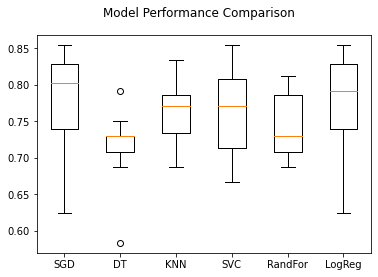

In [68]:
#plot this
classifiers=['SGD', 'DT','KNN','SVC','RandFor', 'LogReg']
boxplot = plt.figure()
boxplot.suptitle('Model Performance Comparison')
ax = boxplot.add_subplot(111)
plt.boxplot(accuracy)
ax.set_xticklabels(classifiers)
plt.show()


In [95]:
#So it seems like fine-tuned SGD is ultimately is the best for this binary classification problem.
# Let's take a better look at evaluating the performance of this classifier by looking at the confusion matrix. 


from sklearn.model_selection import cross_val_predict
y_train_predictions = cross_val_predict(sgd_fine_tuned, top_features, y_train_diabetic, cv=3)

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_diabetic, y_train_predictions)

array([[284,  34],
       [ 72,  90]])

<AxesSubplot:>

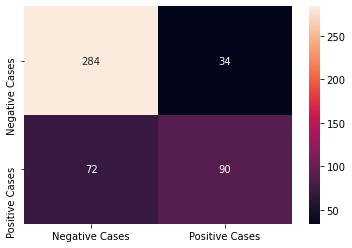

In [97]:
#Let's visualise this confusion matrix a bit better through a heatmap
import seaborn as sns

conf_matrix =confusion_matrix(y_train_diabetic, y_train_predictions)
label= ['Negative Cases', 'Positive Cases']
sns.heatmap(conf_matrix, annot=True, xticklabels=label, yticklabels=label, fmt='.3g')

In [99]:
#Scikit-Learn provides several functions to compute classifier metrics, including precision and recall:

from sklearn.metrics import precision_score, recall_score

In [100]:
#Precision 
precision_score(y_train_diabetic, y_train_predictions) # == 90 / (90 + 35) == 0.725

0.7258064516129032

In [101]:
#Recall
recall_score(y_train_diabetic, y_train_predictions) # == 90 / (90 + 72) == 0.555

0.5555555555555556

In [104]:
# F1 Score
from sklearn.metrics import f1_score

f1_score(y_train_diabetic, y_train_predictions)

0.6293706293706294

In [137]:
some_case = X_train.loc[53] #select a random outcome 

y_decision_scores = sgd_fine_tuned.decision_function([some_case])
y_decision_scores

array([0.73883425])

In [138]:
threshold = 0
y_some_case_prediction = (y_decision_scores > threshold)

In [139]:
y_some_case_prediction #predicts that from this case, the outcome should be True (i.e. 1)

array([ True])

In [141]:
y_train.loc[53] #it's correct! 

1

In [145]:
#The SGDClassifier uses a threshold equal to 0, so the previous code returns
#the same result as the predict() method (i.e. [True)]. 
#Let's raise the threshold:
threshold = 1000
y_some_case_prediction = (y_decision_scores > threshold)

In [146]:
y_some_case_prediction

array([False])

In [147]:
#Let's figure out what threshold to choose

#First, use the cross_val_predict() function to get the scores of all instances
#in the training set, but this time specify that you want to return decision scores
#instead of predictions:

y_decision_scores = cross_val_predict(sgd_fine_tuned, X_train, y_train_diabetic, cv=5, method="decision_function")
y_decision_scores

array([-0.9754194 , -0.23837028, -0.8452436 ,  0.18144547, -0.45747111,
       -0.58552681, -0.96154652,  1.13376494, -0.03236075,  0.67026201,
       -0.78896305, -0.38473086,  0.17359373, -0.26730632, -0.64597783,
       -0.72644804, -0.18876726, -1.07314309, -0.49870059, -0.33670332,
       -0.28350467, -0.6500929 ,  0.15954401,  0.61712934, -0.07698427,
       -1.91297182, -0.66644998, -0.58006995, -0.24669097, -0.63855564,
        0.56255852, -0.00899477, -1.06289897, -0.49075806, -0.43564554,
       -0.44151193, -0.54488271, -0.09964717,  0.68067336, -0.70457061,
       -0.11013075, -0.26826033, -1.06335609,  0.111125  , -0.25594706,
       -1.3237889 , -0.45802656, -0.52370244, -0.29435596,  0.35945215,
       -0.34766372, -0.26821582,  0.6000046 ,  0.25106361,  0.44132012,
        0.13745997, -0.29880917, -0.28881191, -0.59997275, -0.34708733,
       -0.54717697,  0.08449467, -1.4640319 , -0.15945422, -0.09864248,
       -0.81221433, -0.77417844,  0.14624162, -0.66518951, -0.40

In [148]:
#With these scores, use the "precision_recall_curve()" function to compute precision and recall
#for all possible thresholds:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_diabetic, y_decision_scores)

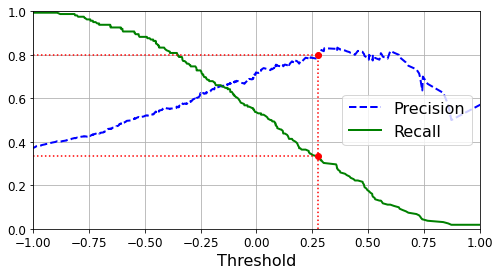

In [182]:
#Finally, use Matplotlib to plot precision and recall as functions of the threshold value: (focus on precision)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-1, 1, 0, 1])

recall_90_precision = recalls[np.argmax(precisions >= 0.80)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.80)]

plt.figure(figsize=(8,4))

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0, 0.8], "r:")
plt.plot([-1, threshold_90_precision], [0.8, 0.8],"r:")
plt.plot([-1, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.8], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()

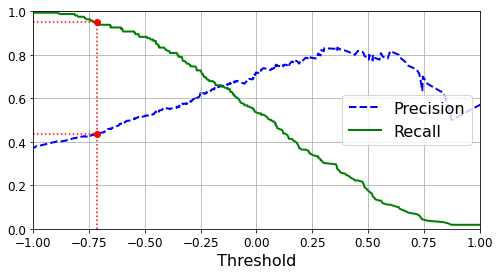

In [269]:
#Finally, use Matplotlib to plot precision and recall as functions of the threshold value: (focus on Recall)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-1, 1, 0, 1])

recall_90_precision = precisions[np.argmin(recalls >= 0.95)]
threshold_90_precision = thresholds[np.argmin(recalls >= 0.95)]

plt.figure(figsize=(8,4))

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0, 0.95], "r:")
plt.plot([-1, threshold_90_precision], [0.95, 0.95],"r:")
plt.plot([-1, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.95], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()

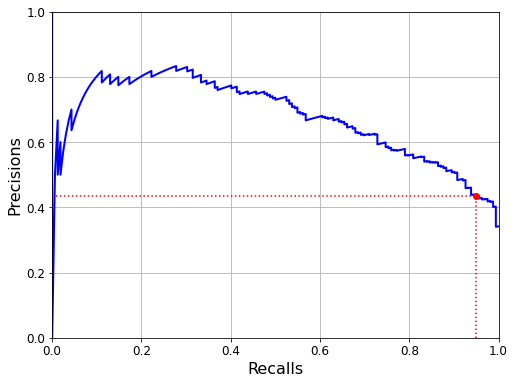

In [312]:
#Another way to select a good precision/recall trade-off is to plot precision directly against recall
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recalls", fontsize=16)
    plt.ylabel("Precisions", fontsize=16)
    plt.axis([0,1,0,1])
    plt.grid(True)
    

recall_90_precision = precisions[np.argmin(recalls >= 0.95)]

plt.figure(figsize=(8,6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.95, 0.95], [0,recall_90_precision], "r:")
plt.plot([0.0, 0.95], [recall_90_precision, recall_90_precision], "r:")
plt.plot([0.95],[recall_90_precision],  "ro")
plt.show()

In [318]:
#You can see that precision starts to fall gradually around 30% recall. 
#As we are looking to maximise our recall, we are happy with around a 45% precision in exchange for a 95% recall. 
#So to look into it more precisely, lets look at what the threshold and precision will be for a recall of 95%:

In [313]:
threshold_95_recall = thresholds[np.argmin(recalls >= 0.95)]

In [314]:
threshold_95_recall

-0.7130203934761752

In [315]:
y_train_predictions_95 = (y_decision_scores >= threshold_95_recall)


In [317]:
precision_score(y_train_diabetic, y_train_predictions_95)

0.4358974358974359

In [316]:
recall_score(y_train_diabetic, y_train_predictions_95)

0.9444444444444444

In [323]:
#Lets plot the ROC Curve
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_diabetic, y_decision_scores)

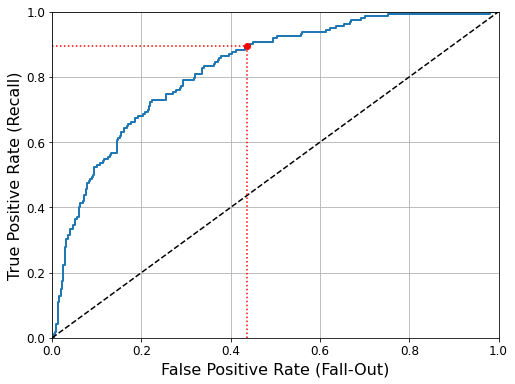

In [389]:
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0,1], [0,1], "k--") 
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)
    
plt.figure(figsize=(8,6))
plot_roc_curve(false_positive_rate, true_positive_rate)
tpr_90 = true_positive_rate[np.argmax(false_positive_rate >= recall_90_precision)]
plt.plot([0., recall_90_precision],[tpr_90, tpr_90] , "r:")   
plt.plot([recall_90_precision, recall_90_precision],[0.0, tpr_90], "r:")  
plt.plot([recall_90_precision], [tpr_90], "ro")               
plt.show()

In [390]:
#Scikit-Learn provices a function to compute the ROC AUC:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_diabetic, y_decision_scores)

0.8256075782281233

In [507]:
#Let's now train a LogisticRegression and compare its ROC curve and ROC AUC score to those of the 
#SGDClassifier.

logreg_classifier = LogisticRegression(max_iter=1000)

y_probability_logreg = cross_val_predict(logreg_classifier, top_features, y_train_diabetic,
                                         cv=6, method="predict_proba")


In [430]:
#Let's use the positive class's probability as the score:
y_decision_scores_logreg = y_probability_logreg[:,1]   

fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_train_diabetic, y_decision_scores_logreg)

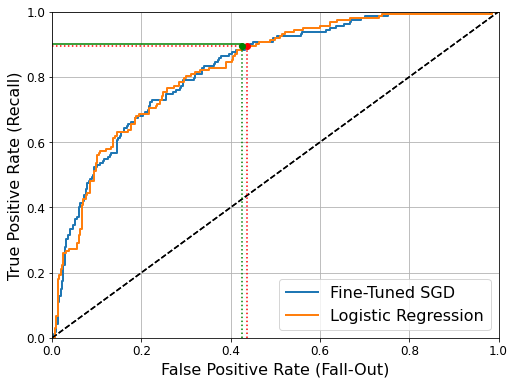

In [541]:
#Let's plot bother ROC curves plot to see how they compare:
recall_for_logreg = tpr_logreg[np.argmax(fpr_logreg >= fpr_90)]

plt.figure(figsize=(8,6))
plot_roc_curve(false_positive_rate,true_positive_rate, label="Fine-Tuned SGD")
plot_roc_curve(fpr_logreg, tpr_logreg, label="Logistic Regression")
plt.plot([0, recall_90_precision], [tpr_90, tpr_90 ], "r:")
plt.plot([recall_90_precision, recall_90_precision], [0, tpr_90],"r:")
plt.plot([recall_90_precision],[tpr_90], "ro")
plt.plot([0, recall_for_logreg], [0.9, 0.9 ], "g-")
plt.plot([recall_for_logreg], [tpr_90], "go")
plt.plot([recall_for_logreg, recall_for_logreg], [0, tpr_90],"g:")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [503]:
#As you can see the LogisticRegression Classifier's ROC curve looks barely better than the SGDClassifier's. 
#As a result, it's ROC AUC score will also be a little bit better:

roc_auc_score(y_train_diabetic, y_decision_scores_logreg) 

0.8263452131376661

In [522]:
#Let's compare it against our Fine-Tuned KNN Classifier
y_probability_knn = cross_val_predict(knn_fine_tuned, top_features, y_train_diabetic,
                                         cv=6, method="predict_proba")

#Let's compare it against our Fine-Tuned RandomForestClassifier
y_probability_rf = cross_val_predict(rf_fine_tuned, top_features, y_train_diabetic,
                                         cv=6, method="predict_proba")


In [523]:
#Let's use the positive class's probability as the score:
y_decision_scores_knn = y_probability_knn[:,1]   # scores = probability of positive class 

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train_diabetic, y_decision_scores_knn)


#Let's use the positive class's probability as the score:
y_decision_scores_rf = y_probability_rf[:,1]   

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_diabetic, y_decision_scores_rf)

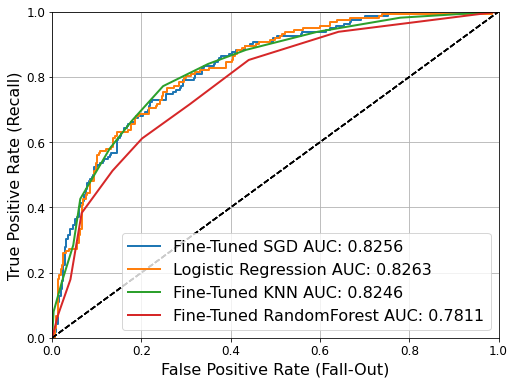

In [539]:
#Let's plot all the ROC curves & their AUC score to see how they compare:
recall_for_knn = tpr_knn[np.argmax(fpr_knn >= 0.9)]

plt.figure(figsize=(8,6))
plot_roc_curve(false_positive_rate, true_positive_rate, label=f"Fine-Tuned SGD AUC: {round(roc_auc_score(y_train_diabetic, y_decision_scores),4)}")
plot_roc_curve(fpr_logreg, tpr_logreg, label=f"Logistic Regression AUC: {round(roc_auc_score(y_train_diabetic, y_decision_scores_logreg),4)}")
plot_roc_curve(fpr_knn, tpr_knn, label=f"Fine-Tuned KNN AUC: {round(roc_auc_score(y_train_diabetic, y_decision_scores_knn),4)}")
plot_roc_curve(fpr_rf, tpr_rf, label=f"Fine-Tuned RandomForest AUC: {round(roc_auc_score(y_train_diabetic, y_decision_scores_rf),4)}")

plt.legend(loc="lower right", fontsize=16)
plt.show()

In [540]:
#SGD, LogReg & KNN are all pretty much the same in terms of ROC AUC. Although LogReg is slightly better. 
#We definitely need more data to allow for better prediction of diabetes, as the seriousness of this problem
#requires much greater recall/precision & AUC. 